<a href="https://colab.research.google.com/github/AmirMohamadBabaee/NN-project-keras/blob/main/CI_9831011_nnproject_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

# Load Dataset
in this part, load the whole dataset. note label values are between 0 and 9. they need to map to one-hot encoding.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print(f'x_train.shape: {x_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


## One-Hot Encoding
Encode labels to One-Hot encoding

In [ ]:
y_train_oh = tf.reshape(tf.one_hot(y_train, 10, axis=1), (-1, 10))
y_test_oh = tf.reshape(tf.one_hot(y_test, 10, axis=1), (-1, 10))

In [ ]:
print(f'x_train.shape: {x_train.shape}')
print(f'y_train.shape: {y_train_oh.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_test.shape: {y_test_oh.shape}')

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 10)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 10)


# Preprocess Data

In [ ]:
x_train_float = x_train.astype('float32')
x_test_float = x_test.astype('float32')
x_train_norm = x_train_float / 255.0
x_test_norm = x_test_float / 255.0

# Model Implementation


## Simple Model
this model, only includes Conv and MaxPool layers plus fully connected layers.

In [ ]:
def create_model(input_shape=(32, 32, 3), model_name='cifar10_model'):

  # input layer
  input_tensor = keras.Input(shape=input_shape)

  # first convolution pair
  X = keras.layers.Conv2D(32, 3, padding='same', activation='relu')(input_tensor)
  X = keras.layers.Conv2D(32, 3, padding='same', activation='relu')(X)

  X = keras.layers.MaxPool2D()(X)

  # second convolution pair
  X = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(X)
  X = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(X)

  X = keras.layers.MaxPool2D()(X)

  # third convolution pair
  X = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(X)
  X = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(X)

  X = keras.layers.MaxPool2D()(X)

  # forth convolution pair
  X = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(X)
  X = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(X)

  X = keras.layers.MaxPool2D()(X)

  # fully connected layer
  X = keras.layers.Flatten()(X)
  X = keras.layers.Dense(128, activation='relu')(X)
  X = keras.layers.Dense(128, activation='relu')(X)
  X = keras.layers.Dense(64, activation='relu')(X)
  X = keras.layers.Dense(10, activation='relu')(X)
  X = keras.layers.Dense(10, activation='softmax')(X)

  model = keras.Model(inputs=input_tensor, outputs=X, name=model_name)
  model.summary()
  return model

In [ ]:
simple_model = create_model(model_name='cifar10_model_simple')

Model: "cifar10_model_simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                              

In [ ]:
simple_model.compile(
    optimizer = 'adam',
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
simple_history = simple_model.fit(x_train_norm, y_train_oh, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 8s 9ms/step - loss: 2.3027 - accuracy: 0.0980
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3027 - accuracy: 0.0978
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3027 - accuracy: 0.0983
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3027 - accuracy: 0.0980
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3027 - accuracy: 0.0992
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3027 - accuracy: 0.0972
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3027 - accuracy: 0.0971
Epoch 8/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3027 - accuracy: 0.0975
Epoch 9/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3028 - accuracy: 0.0966
Epoch 10/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3027 - accuracy: 0.0985

## Model with Batch Normalization
Training deep neural networks with tens of layers is challenging as they can be sensitive to the initial random weights and configuration of the learning algorithm.

One possible reason for this difficulty is the distribution of the inputs to layers deep in the network may change after each mini-batch when the weights are updated. This can cause the learning algorithm to forever chase a moving target. This change in the distribution of inputs to layers in the network is referred to the technical name “internal covariate shift.”

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

\
[A Gentle Introduction to Batch Normalization for Deep Neural Networks](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/)

In [ ]:
def create_model_BN(input_shape=(32, 32, 3), model_name='cifar10_model'):

  # input layer
  input_tensor = keras.Input(shape=input_shape)

  # first convolution pair
  X = keras.layers.Conv2D(32, 3, padding='same')(input_tensor)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.Conv2D(32, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.MaxPool2D()(X)

  # second convolution pair
  X = keras.layers.Conv2D(64, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.Conv2D(64, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.MaxPool2D()(X)

  # third convolution pair
  X = keras.layers.Conv2D(128, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.Conv2D(128, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.MaxPool2D()(X)

  # forth convolution pair
  X = keras.layers.Conv2D(128, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.Conv2D(128, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.MaxPool2D()(X)

  # fully connected layer
  X = keras.layers.Flatten()(X)
  X = keras.layers.Dense(128, activation='relu')(X)
  X = keras.layers.Dense(128, activation='relu')(X)
  X = keras.layers.Dense(64, activation='relu')(X)
  X = keras.layers.Dense(10, activation='relu')(X)
  X = keras.layers.Dense(10, activation='softmax')(X)

  model = keras.Model(inputs=input_tensor, outputs=X, name=model_name)
  model.summary()
  return model

In [ ]:
BN_model = create_model_BN(model_name='cifar10_model_BN')

Model: "cifar10_model_BN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                  

In [ ]:
BN_model.compile(
    optimizer = 'adam',
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
BN_history = BN_model.fit(x_train_norm, y_train_oh, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 8s 11ms/step - loss: 0.1512 - accuracy: 0.9481
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 0.1294 - accuracy: 0.9560
Epoch 3/10
782/782 [==============================] - 8s 11ms/step - loss: 0.1105 - accuracy: 0.9622
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.0975 - accuracy: 0.9678
Epoch 5/10
782/782 [==============================] - 8s 11ms/step - loss: 0.0846 - accuracy: 0.9722
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0820 - accuracy: 0.9718
Epoch 7/10
782/782 [==============================] - 8s 11ms/step - loss: 0.0762 - accuracy: 0.9744
Epoch 8/10
782/782 [==============================] - 8s 11ms/step - loss: 0.0728 - accuracy: 0.9764
Epoch 9/10
782/782 [==============================] - 8s 11ms/step - loss: 0.0620 - accuracy: 0.9798
Epoch 10/10
782/782 [==============================] - 8s 11ms/step - loss: 0.0634 - accura

## Model with Batch Normalization and Dropout
Dropout is implemented per-layer in a neural network.

It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long short-term memory network layer.

Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. It is not used on the output layer.

\
[A Gentle Introduction to Dropout for Regularizing Deep Neural Networks](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)

Based on AlexNet Architecture, I used dropout layer for fully connected layers.

In [ ]:
def create_model_BN_dropout(input_shape=(32, 32, 3), model_name='cifar10_model', dropout_rate=0.2):

  # input layer
  input_tensor = keras.Input(shape=input_shape)

  # first convolution pair
  X = keras.layers.Conv2D(32, 3, padding='same')(input_tensor)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.Conv2D(32, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.MaxPool2D()(X)

  # second convolution pair
  X = keras.layers.Conv2D(64, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.Conv2D(64, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.MaxPool2D()(X)

  # third convolution pair
  X = keras.layers.Conv2D(128, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.Conv2D(128, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.MaxPool2D()(X)

  # forth convolution pair
  X = keras.layers.Conv2D(128, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.Conv2D(128, 3, padding='same')(X)
  X = keras.layers.BatchNormalization()(X)
  X = keras.activations.relu(X)

  X = keras.layers.MaxPool2D()(X)

  # fully connected layer
  X = keras.layers.Flatten()(X)
  X = keras.layers.Dropout(dropout_rate)(X)

  X = keras.layers.Dense(128, activation='relu')(X)
  X = keras.layers.Dropout(dropout_rate)(X)
  
  X = keras.layers.Dense(128, activation='relu')(X)
  X = keras.layers.Dropout(dropout_rate)(X)
  
  X = keras.layers.Dense(64, activation='relu')(X)
  X = keras.layers.Dropout(dropout_rate)(X)
  
  X = keras.layers.Dense(10, activation='relu')(X)
  X = keras.layers.Dropout(dropout_rate)(X)
  
  X = keras.layers.Dense(10, activation='softmax')(X)

  model = keras.Model(inputs=input_tensor, outputs=X, name=model_name)
  model.summary()
  return model

In [ ]:
BN_dropout_model = create_model_BN_dropout(model_name='cifar10_model_BN_dropout')

Model: "cifar10_model_BN_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 tf.nn.relu_16 (TFOpLambda)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                         

In [ ]:
BN_dropout_model.compile(
    optimizer = 'adam',
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
BN_dropout_history = BN_dropout_model.fit(x_train_norm, y_train_oh, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 9s 12ms/step - loss: 0.5283 - accuracy: 0.8313
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 0.4920 - accuracy: 0.8477
Epoch 3/10
782/782 [==============================] - 8s 11ms/step - loss: 0.4518 - accuracy: 0.8597
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.4184 - accuracy: 0.8698
Epoch 5/10
782/782 [==============================] - 8s 11ms/step - loss: 0.4062 - accuracy: 0.8748
Epoch 6/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3870 - accuracy: 0.8817
Epoch 7/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3697 - accuracy: 0.8854
Epoch 8/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3448 - accuracy: 0.8946
Epoch 9/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3259 - accuracy: 0.9004
Epoch 10/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3350 - accura

In [ ]:
def draw_history_graph(history, title):
  accuracy = history.history['accuracy']
  loss = history.history['loss']
  epochs_num = len(loss)

  plt.figure(figsize=(15, 5))
  plt.subplot(1, 2, 1)
  plt.xlabel('epoch')
  plt.ylabel('cost')
  plt.title(title + ' Loss')
  plt.plot(range(1, epochs_num+1), loss)
  plt.subplot(1, 2, 2)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title(title + ' Accuracy')
  plt.plot(range(1, epochs_num+1), accuracy)

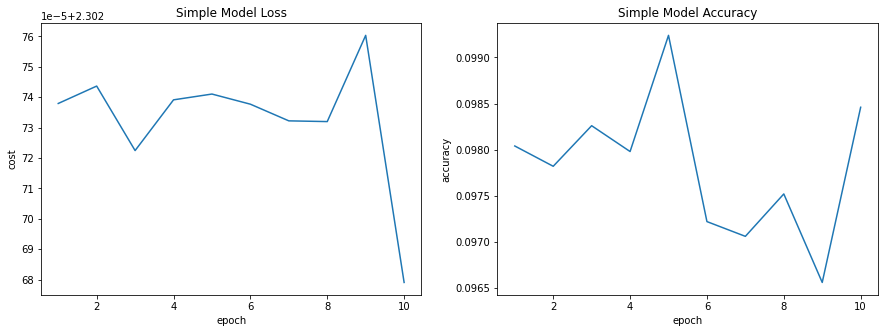

In [ ]:
draw_history_graph(simple_history, 'Simple Model')

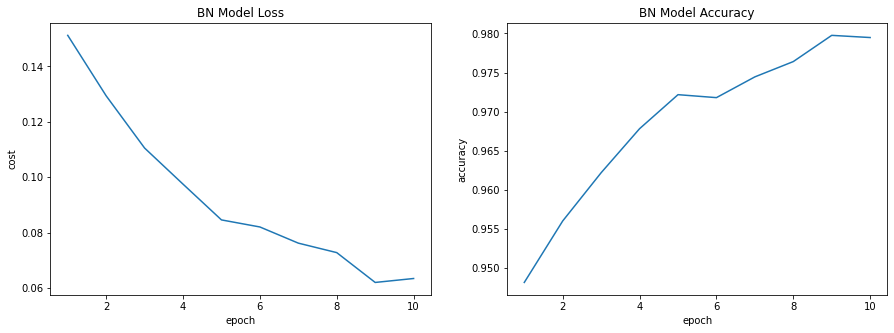

In [ ]:
draw_history_graph(BN_history, 'BN Model')

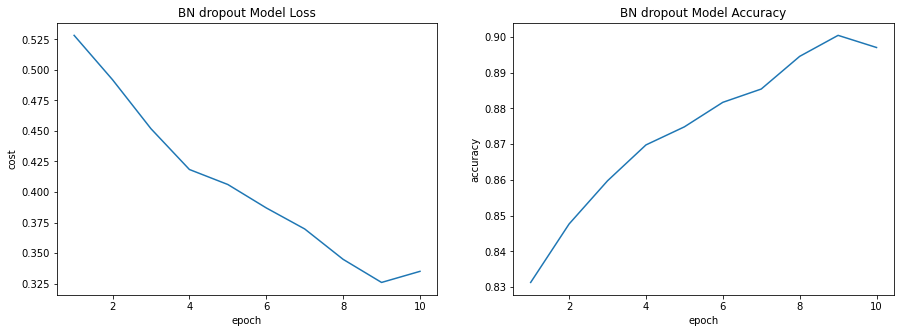

In [ ]:
draw_history_graph(BN_dropout_history, 'BN dropout Model')

# Metrics
||Positive Prediction|Negative Prediction|
|-|-|-|
|**Positive Class**|True Positive (TP)|False Negative (FN)|
|**Negative Class**|False Positive (FP)|True Negative (TN)|

- Precision: the fraction of relevant instances among the retrieved instances
$$Precision = \frac{TP}{TP+FP}$$
- Recall: the fraction of relevant instances that were retrieved
$$Recall = \frac{TP}{TP + FN}$$
- F1 score:
$$F1 score = \frac{2 (precision \times recall)}{precision + recall}$$

# Optimizers
in this notebook, we're going to check following optimizers
- Stochastic Gradient Descent (SGD)
- Root Mean Squared Propagation (RMSprop)
- ADAM

## Stochastic Gradient Descent
this is Gradient descent (with momentum) optimizer. momentum is a coefficient which decrease oscillation towards optimum. we will check this optimizer with last model (model with BN and dropout).

In [ ]:
BN_dropout_model = create_model_BN_dropout(model_name='cifar10_model_BN_dropout')
BN_dropout_model.compile(
    optimizer = 'sgd',
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy', 'Precision', 'Recall']
)

Model: "cifar10_model_BN_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_48 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 tf.nn.relu_48 (TFOpLambda)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_49 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                         

In [ ]:
BN_dropout_history_sgd = BN_dropout_model.fit(x_train_norm, y_train_oh, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 10s 11ms/step - loss: 2.1304 - accuracy: 0.1939 - precision: 0.4974 - recall: 0.0155
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 1.8098 - accuracy: 0.3042 - precision: 0.5485 - recall: 0.0674
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 1.6475 - accuracy: 0.3754 - precision: 0.6179 - recall: 0.1335
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 1.5175 - accuracy: 0.4306 - precision: 0.6648 - recall: 0.2049
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 1.3991 - accuracy: 0.4765 - precision: 0.6946 - recall: 0.2671
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 1.2966 - accuracy: 0.5230 - precision: 0.7310 - recall: 0.3294
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 1.2045 - accuracy: 0.5647 - precision: 0.7579 - recall: 0.3821
Epoch 8/10
782/782 [=============

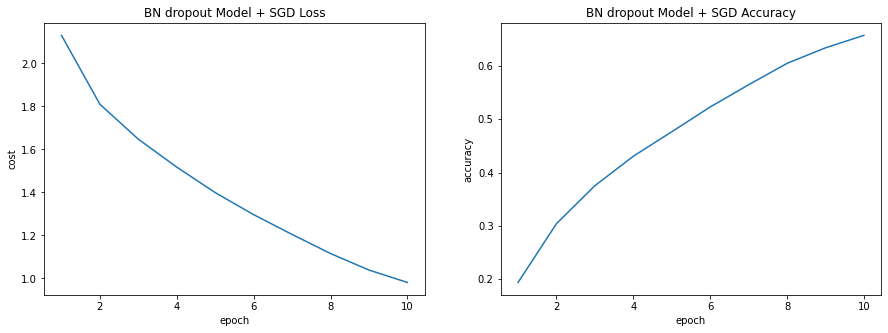

In [ ]:
draw_history_graph(BN_dropout_history_sgd, 'BN dropout Model + SGD')

In [ ]:
sgd_loss, sgd_accuracy, sgd_precision, sgd_recall = BN_dropout_model.evaluate(x_test_norm, y_test_oh)
print(f'loss= {sgd_loss}')
print(f'accuracy= {sgd_accuracy}')
print(f'precision= {sgd_precision}')
print(f'recall= {sgd_recall}')

313/313 [==============================] - 2s 5ms/step - loss: 1.0277 - accuracy: 0.6484 - precision: 0.7711 - recall: 0.5251
loss= 1.027726173400879
accuracy= 0.6484000086784363
precision= 0.7710719704627991
recall= 0.5250999927520752


In [ ]:
print('Confusion Matrix\n',confusion_matrix(y_test, np.argmax(BN_dropout_model(x_test), axis=1)), sep='')

Confusion Matrix
[[  3 906   0   0   0   0   0  34   0  57]
 [  0 945   0   0   0   0   0  19   0  36]
 [  0 724   0   0   0   0   0 113   0 163]
 [  5 688   0   0   0   0   0 137   0 170]
 [  1 701   0   0   0   0   0 148   0 150]
 [  0 617   0   0   0   0   0 204   0 179]
 [  2 723   0   0   0   0   0 134   0 141]
 [  1 361   0   0   0   0   0 468   0 170]
 [  0 883   0   0   0   0   0  21   0  96]
 [  1 616   0   0   0   0   0 109   0 274]]


## Root Mean Squared Propagation (RMSprop)
Optimizer that implements the RMSprop algorithm.

The gist of RMSprop is to:

- Maintain a moving (discounted) average of the square of gradients
- Divide the gradient by the root of this average

A limitation of gradient descent is that it uses the same step size (learning rate) for each input variable. AdaGrad, for short, is an extension of the gradient descent optimization algorithm that allows the step size in each dimension used by the optimization algorithm to be automatically adapted based on the gradients seen for the variable (partial derivatives) over the course of the search.

A limitation of AdaGrad is that it can result in a very small step size for each parameter by the end of the search that can slow the progress of the search down too much and may mean not locating the optima.

Root Mean Squared Propagation, or RMSProp, is an extension of gradient descent and the AdaGrad version of gradient descent that uses a decaying average of partial gradients in the adaptation of the step size for each parameter. The use of a decaying moving average allows the algorithm to forget early gradients and focus on the most recently observed partial gradients seen during the progress of the search, overcoming the limitation of AdaGrad.

\
[Gradient Descent With RMSProp from Scratch](https://machinelearningmastery.com/gradient-descent-with-rmsprop-from-scratch/)


In [ ]:
BN_dropout_model = create_model_BN_dropout(model_name='cifar10_model_BN_dropout')
BN_dropout_model.compile(
    optimizer = 'rmsprop',
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy', 'Precision', 'Recall']
)

Model: "cifar10_model_BN_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_72 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_56 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 tf.nn.relu_56 (TFOpLambda)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_57 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                         

In [ ]:
BN_dropout_history_rmsprop = BN_dropout_model.fit(x_train_norm, y_train_oh, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 12s 13ms/step - loss: 1.8243 - accuracy: 0.3200 - precision: 0.6144 - recall: 0.1060
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.3650 - accuracy: 0.5183 - precision: 0.7327 - recall: 0.3246
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1417 - accuracy: 0.6179 - precision: 0.7987 - recall: 0.4492
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 1.0125 - accuracy: 0.6666 - precision: 0.8309 - recall: 0.5177
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.9130 - accuracy: 0.7030 - precision: 0.8504 - recall: 0.5646
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.8440 - accuracy: 0.7283 - precision: 0.8594 - recall: 0.6020
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.7770 - accuracy: 0.7569 - precision: 0.8693 - recall: 0.6479
Epoch 8/10
782/782 [=======

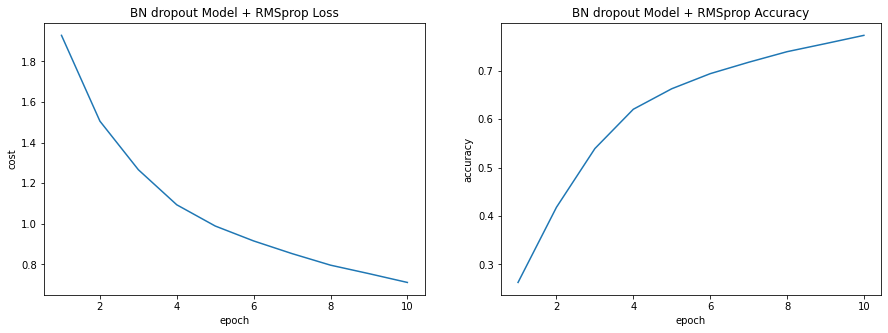

In [ ]:
draw_history_graph(BN_dropout_history_rmsprop, 'BN dropout Model + RMSprop')

In [ ]:
rmsprop_loss, rmsprop_accuracy, rmsprop_precision, rmsprop_recall = BN_dropout_model.evaluate(x_test_norm, y_test_oh)
print(f'loss= {rmsprop_loss}')
print(f'accuracy= {rmsprop_accuracy}')
print(f'precision= {rmsprop_precision}')
print(f'recall= {rmsprop_recall}')

313/313 [==============================] - 2s 6ms/step - loss: 0.8976 - accuracy: 0.7483 - precision: 0.8278 - recall: 0.6872
loss= 0.8976079821586609
accuracy= 0.7483000159263611
precision= 0.8277523517608643
recall= 0.6872000098228455


In [ ]:
print('Confusion Matrix\n',confusion_matrix(y_test, np.argmax(BN_dropout_model(x_test), axis=1)), sep='')

Confusion Matrix
[[   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0  999    0    0    0    0    0    0    0    1]
 [   0  998    0    0    0    0    0    0    0    2]
 [   0  998    0    0    0    0    0    0    0    2]
 [   0  988    0    0    0    0    0    1    0   11]
 [   0  999    0    0    0    0    0    0    0    1]
 [   0  973    0    0    0    0    0    6    0   21]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0  997    0    0    0    0    0    0    0    3]]


## Adam
Adam is different to classical stochastic gradient descent.

Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.

The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

- Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
- Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both AdaGrad and RMSProp.

Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).

Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

\
[Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

In [ ]:
BN_dropout_model = create_model_BN_dropout(model_name='cifar10_model_BN_dropout')
BN_dropout_model.compile(
    optimizer = 'adam',
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy', 'Precision', 'Recall']
)

Model: "cifar10_model_BN_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_80 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_64 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 tf.nn.relu_64 (TFOpLambda)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_81 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_65 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                         

In [ ]:
BN_dropout_history_adam = BN_dropout_model.fit(x_train_norm, y_train_oh, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 16s 19ms/step - loss: 2.0528 - accuracy: 0.2220 - precision: 0.5363 - recall: 0.0321
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.6095 - accuracy: 0.3673 - precision: 0.6122 - recall: 0.1235
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.3978 - accuracy: 0.4660 - precision: 0.6694 - recall: 0.2381
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1843 - accuracy: 0.5676 - precision: 0.7344 - recall: 0.3764
Epoch 5/10
782/782 [==============================] - 9s 12ms/step - loss: 1.0099 - accuracy: 0.6553 - precision: 0.8088 - recall: 0.5004
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 0.8982 - accuracy: 0.6983 - precision: 0.8341 - recall: 0.5606
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 0.8177 - accuracy: 0.7316 - precision: 0.8535 - recall: 0.6097
Epoch 8/10
782/782 [==========

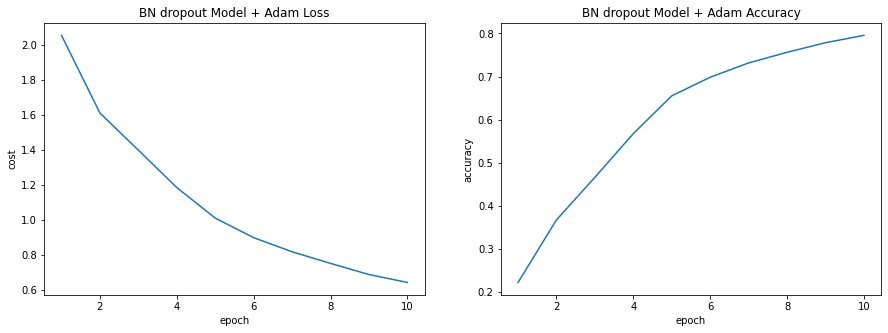

In [ ]:
draw_history_graph(BN_dropout_history_adam, 'BN dropout Model + Adam')

In [ ]:
adam_loss, adam_accuracy, adam_precision, adam_recall = BN_dropout_model.evaluate(x_test_norm, y_test_oh)
print(f'loss= {adam_loss}')
print(f'accuracy= {adam_accuracy}')
print(f'precision= {adam_precision}')
print(f'recall= {adam_recall}')

313/313 [==============================] - 2s 6ms/step - loss: 1.0332 - accuracy: 0.7341 - precision: 0.8037 - recall: 0.6830
loss= 1.033244252204895
accuracy= 0.7340999841690063
precision= 0.8037185072898865
recall= 0.6830000281333923


based on accuracy, we can say adam optimazation has done its job better. so now we compute F1 score for third one.

In [ ]:
best_model_precision = BN_dropout_history_adam.history['precision'][-1]
best_model_recall = BN_dropout_history_adam.history['recall'][-1]
best_model_F1_score = 2 * (best_model_precision * best_model_recall)/(best_model_precision + best_model_recall)
print(f'Precision= {best_model_precision}')
print(f'Recall= {best_model_recall}')
print(f'F1 score= {best_model_F1_score}')

Precision= 0.8921344876289368
Recall= 0.7116199731826782
F1 score= 0.7917181035812193


In [ ]:
new_model = create_model(model_name='new_model')

Model: "new_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        36928     
                                                         

In [ ]:
print('Confusion Matrix\n',confusion_matrix(y_test, np.argmax(BN_dropout_model(x_test), axis=1)), sep='')

Confusion Matrix
[[  1 494   0   0   0  15   0 141   0 349]
 [  0 756   0   0   0  24   0  36   0 184]
 [  1 264   0   0   0 314   0 183   0 238]
 [  0 170   0   2   0 299   0 202   0 327]
 [  0 164   0   0   0 398   0 229   0 209]
 [  0  86   0   0   0 597   0 152   0 165]
 [  0 295   1   0   0 272   0 127   0 305]
 [  0  58   0   0   0 343   0 473   0 126]
 [  0 410   0   0   0  22   0 166   7 395]
 [  0 191   0   0   0  32   0 130   0 647]]


# Data Augmentation
Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points. 

For data augmentation, making simple alterations on visual data is popular. In addition, generative adversarial networks (GANs) are used to create new synthetic data. Classic image processing activities for data augmentation are:

- padding
- random rotating
- re-scaling
- vertical and horizontal flipping
- translation ( image is moved along X, Y direction)
- cropping
- zooming
- darkening & brightening/color modification
- grayscaling
- changing contrast
- adding noise
- random erasing

![types of augmentation](https://research.aimultiple.com/wp-content/webp-express/webp-images/uploads/2021/04/dataaugmention_image_alletranitons.png.webp)

\
[What is Data Augmentation? Techniques & Examples in 2022](https://research.aimultiple.com/data-augmentation/)

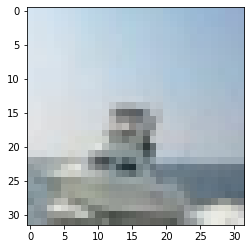

In [ ]:
sample_data = x_train[100]
plt.imshow(sample_data)

In [ ]:
gen = ImageDataGenerator(
    rotation_range=30, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.15, 
    zoom_range=0.2, 
    channel_shift_range=10., 
    horizontal_flip=True
)

In [ ]:
def plot_generated_images(augmented_images):
  plt.suptitle("Augmented Images")
  for i in range(len(augmented_images)):
    plt.subplot(2, 5, i+1)
    plt.axis(False)
    plt.imshow(augmented_images[i])
  plt.tight_layout()

In [ ]:
index = 100
sample_image = np.expand_dims(x_train[index], 0)
augment_gen = gen.flow(sample_image)
aug_images = [next(augment_gen)[0].astype(np.uint8) for i in range(10)]

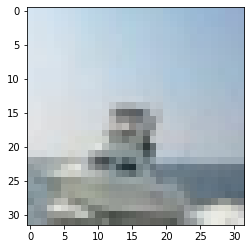

In [ ]:
plt.imshow(sample_image[0])

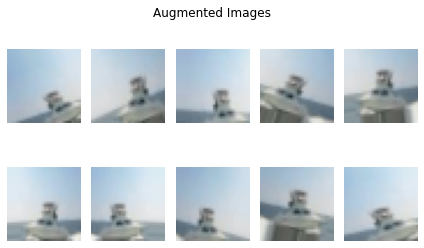

In [ ]:
plot_generated_images(aug_images)

## Load cats vs dogs Dataset

In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   159M      0  0:00:04  0:00:04 --:--:--  173M


In [ ]:
!unzip -q kagglecatsanddogs_3367a.zip
!ls

 kagglecatsanddogs_3367a.zip   PetImages        sample_data
'MSR-LA - 3467.docx'	      'readme[1].txt'


In [ ]:
!ls PetImages

Cat  Dog


In [ ]:
source_path = './PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [ ]:
image_size = (32, 32)
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_ds = train_datagen.flow_from_directory(
    "PetImages",
    class_mode='binary',
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
)
val_ds = train_datagen.flow_from_directory(
    "PetImages",
    class_mode='binary',
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
)